THỰC HÀNH 5: XÁC ĐỊNH ĐỐI TƯỢNG TRONG ẢNH

1. CÀI ĐẶT THƯ VIỆN


In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\X270\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


2. VIẾT CHƯƠNG TRÌNH GÁN NHÃN ẢNH

2.1 Gán nhãn ảnh

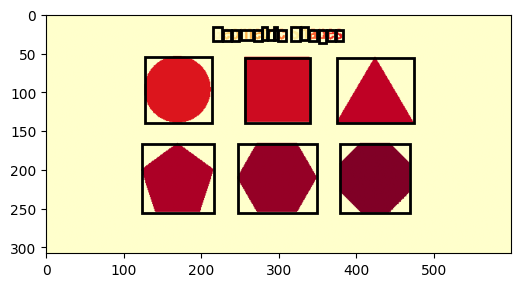

In [3]:
from PIL import Image 
import numpy as np
import imageio.v2 as iio 
import scipy.ndimage as nd
from skimage.morphology import label 
from skimage.measure import regionprops
import matplotlib.pylab as plt 
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
a = np.asarray(data)
# performing Otsu's thresholding
thres = threshold_otsu(a)
# pixels with intensity greater than threshold are kept
b = a > thres
# labelling is performed on b
c = label(b)
cl = Image.fromarray((c * (255 // c.max())).astype(np.uint8))
iio.imsave('label_output.jpg', cl)
# on the labelled image c, regionprops is performed
properties = ['Area', 'Centroid', 'BoundingBox']
d = regionprops(c)
# the following command creates an empty plot of
# dimension 6 inch by 6 inch
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(c, cmap='YlOrRd')

for i in d:
    lr, lc, ur, uc = i['BoundingBox']
    rec_width = uc - lc
    rec_height = ur - lr
    # Rectangular boxes with origin at (lr,lc) are drawn
    rect = mpatches.Rectangle((lc, lr), rec_width, rec_height, fill=False,
                              edgecolor='black', linewidth=2)

    ax.add_patch(rect)
plt.show()


2.2 Dò tìm cạnh theo chiều dọc

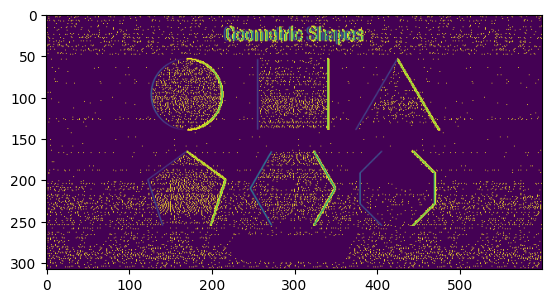

In [4]:
from PIL import Image 
import numpy as np
import imageio.v2 as iio 
import scipy.ndimage as nd
from skimage.morphology import label 
from skimage.measure import regionprops
import matplotlib.pylab as plt 
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
bmg =  abs(data - nd.shift(data, (0, 1), order=0))
plt.imshow(bmg)
plt.show()

2.3 Dò tìm cạnh với Sobel Filter

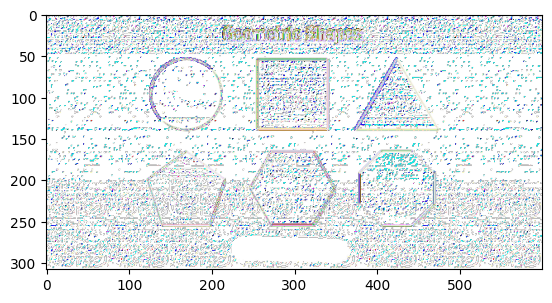

In [10]:
from PIL import Image 
import numpy as np
import imageio.v2 as iio 
import scipy.ndimage as nd
from skimage.morphology import label 
from skimage.measure import regionprops
import matplotlib.pylab as plt 
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png')
a = nd.sobel(data, axis=0)
b = nd.sobel(data, axis=1)
bmg = abs(a) + abs(b)
plt.imshow(bmg)
plt.show()

2.4 Xác định góc của đối tượng

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-49.800000000000004..255.0].


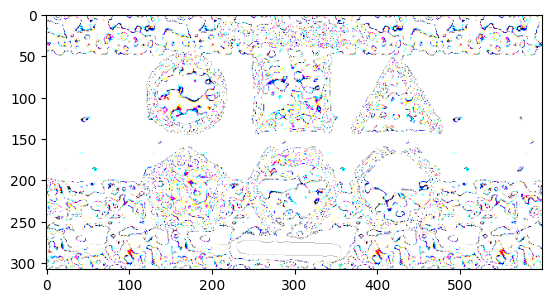

In [11]:
from PIL import Image 
import numpy as np
import imageio.v2 as iio 
import scipy.ndimage as nd
from skimage.morphology import label 
from skimage.measure import regionprops
import matplotlib.pylab as plt 
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def Harris(indata, alpha=0.2):
    x = nd.sobel(indata, 0)
    y = nd.sobel(indata, 1)
    xl = x ** 2
    yl = y ** 2
    xy = x * y
    xy = abs(x * y)
    xl = nd.gaussian_filter(xl,3)
    yl = nd.gaussian_filter(yl,3)
    xy = nd.gaussian_filter(xy,3)

    detC = xl * yl - 2 * xy
    trC = xl + yl
    R = detC - alpha * trC**2
    return R

data = Image.open('geometric.png')
bmg = Harris(data)
plt.imshow(bmg)
plt.show()


2.5 Dò tìm hình dạng cụ thể trong ảnh với Hough Transform 

2.5.1 Dò tìm đường thẳng trong ảnh

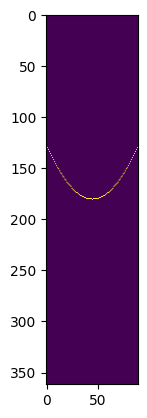

In [12]:
import numpy as np
import cv2 
import imageio.v2 as iio 
import scipy.ndimage as nd
from skimage.morphology import label 
from skimage.measure import regionprops
import matplotlib.pylab as plt 
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def LineHough(data, gamma):
    V, H = data.shape
    R = int(np.sqrt(V * V + H * H))
    ho = np.zeros((R, 90), float)   #Hough space
    w = data + 0
    ok = 1
    theta = np.arange(90)/180.0 * np.pi
    tp = np.arange(90).astype(float)
    while ok:
        mx = w.max()
        if mx < gamma:
            ok = 0
        else:
            v,h = divmod(w.argmax(), H)
            y = V - v
            x = h
            rh = x * np.cos(theta) + y * np.sin(theta)
            for i in range(len(rh)):
                if 0 <= rh[i] < R and 0 <= tp[i] < 90:
                    ho[int(rh[i]), int(tp[i])] += mx
            w[v,h] = 0
    return ho

data = np.zeros((256, 256))
data[128, 128] = 1
bmg = LineHough(data, 0.5)
plt.imshow(bmg)
plt.show()


2.5.2 Dò tìm đường tròn trong ảnh

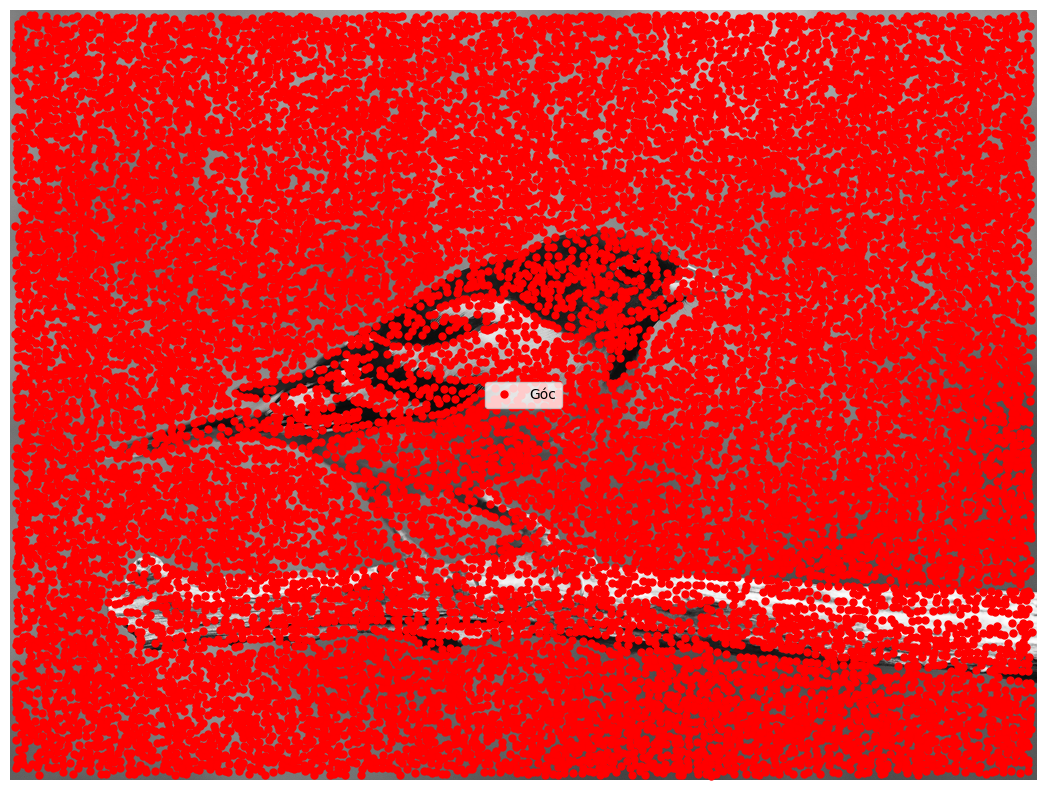

In [14]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray

# Đọc ảnh
data = iio.imread('bird.png')

# Chuyển sang ảnh xám
image_gray = rgb2gray(data)

# Áp dụng thuật toán Harris để phát hiện góc
coords = corner_harris(image_gray, k=0.001)

# Tìm các điểm góc
corners = corner_peaks(coords, min_distance=5)

# Hiển thị kết quả
plt.figure(figsize=(20, 10))
plt.imshow(image_gray, cmap='gray')
plt.plot(corners[:, 1], corners[:, 0], 'r.', markersize=10, label='Góc')
plt.legend()
plt.axis('off')
plt.show()

2.6 Image matching

In [1]:
%pip install opencv-python numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\X270\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


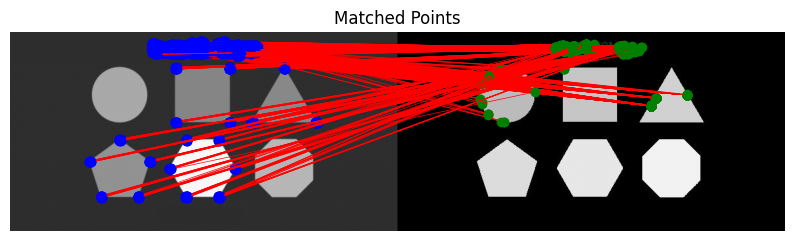

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc hai ảnh grayscale
img1 = cv2.imread('geometric.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('label_output.jpg', cv2.IMREAD_GRAYSCALE)

#Phát hiện điểm góc bằng Harris Corner
def harris_corners(img):
    gray = np.float32(img)
    dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    dst = cv2.dilate(dst, None)
    corners = np.argwhere(dst > 0.01 * dst.max())
    return corners

corners1 = harris_corners(img1)
corners2 = harris_corners(img2)

#Trích xuất patch hình vuông quanh mỗi điểm góc
def extract_patches(img, corners, patch_size=11):
    half = patch_size // 2
    descriptors = []
    valid_points = []
    for y, x in corners:
        if y-half >= 0 and y+half < img.shape[0] and x-half >= 0 and x+half < img.shape[1]:
            patch = img[y-half:y+half+1, x-half:x+half+1]
            descriptors.append(patch.flatten())
            valid_points.append((y, x))
    return np.array(descriptors), valid_points

desc1, pts1 = extract_patches(img1, corners1)
desc2, pts2 = extract_patches(img2, corners2)

#So sánh mô tả đặc trưng bằng khoảng cách Euclidean
matches = []
for i, d1 in enumerate(desc1):
    distances = np.linalg.norm(desc2 - d1, axis=1)
    best_match = np.argmin(distances)
    matches.append((pts1[i], pts2[best_match]))

#Hiển thị kết quả nối điểm tương đồng
def draw_matches(img1, img2, matches):
    h1, w1 = img1.shape
    h2, w2 = img2.shape
    new_img = np.zeros((max(h1, h2), w1 + w2), dtype=np.uint8)
    new_img[:h1, :w1] = img1
    new_img[:h2, w1:] = img2

    plt.figure(figsize=(10, 6))
    plt.imshow(new_img, cmap='gray')
    for (y1, x1), (y2, x2) in matches:
        plt.plot([x1, x2 + w1], [y1, y2], 'r', linewidth=0.5)
        plt.plot(x1, y1, 'bo')
        plt.plot(x2 + w1, y2, 'go')
    plt.axis('off')
    plt.title('Matched Points')
    plt.show()

draw_matches(img1, img2, matches)
